In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
mix = pd.merge(movies,ratings,on ='movieId')

In [6]:
mix.drop(['genres','timestamp'],axis =1,inplace = True)

In [7]:
mix.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [8]:
df = pd.DataFrame(mix.groupby('title')['rating'].mean())
df.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091


In [9]:
df['num of ratings'] = pd.DataFrame(mix.groupby('title')['rating'].count())
df.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.748387,155
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55


In [10]:
df.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.174231,67310
Forrest Gump (1994),4.029000,66172
"Shawshank Redemption, The (1994)",4.446990,63366
"Silence of the Lambs, The (1991)",4.177057,63299
Jurassic Park (1993),3.664741,59715
Star Wars: Episode IV - A New Hope (1977),4.190672,54502
Braveheart (1995),4.042534,53769
Terminator 2: Judgment Day (1991),3.931954,52244
"Matrix, The (1999)",4.187186,51334


In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

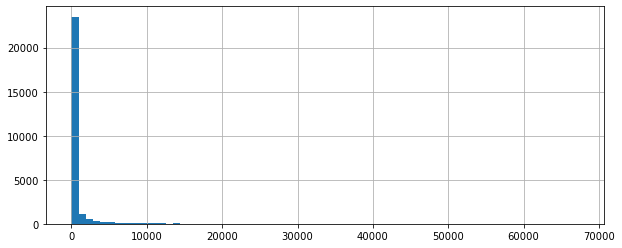

In [12]:
plt.figure(figsize=(10,4))
df['num of ratings'].hist(bins=70)

In [13]:
df['num of ratings'].describe()

count    26729.000000
mean       748.260803
std       3086.673456
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: num of ratings, dtype: float64

In [14]:
mix_short = mix.groupby('userId').filter(lambda x:len(x)>300)

In [15]:
mix_short

,movieId,title,userId,rating
4,1,Toy Story (1995),11,4.5
12,1,Toy Story (1995),24,4.0
18,1,Toy Story (1995),54,4.0
19,1,Toy Story (1995),58,5.0
27,1,Toy Story (1995),91,4.0
...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),79570,4.0
20000259,131256,"Feuer, Eis & Dosenbier (2002)",79570,4.0
20000260,131258,The Pirates (2014),28906,2.5
20000261,131260,Rentun Ruusu (2001),65409,3.0


In [16]:
moviemat = mix_short.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,"""Great Performances"" Cats (1998)",#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),...,"¡Alambrista! (Illegal, The) (1977)",¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005),Åsa-Nisse - Wälkom to Knohult (2011),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
moviemat = moviemat.fillna(0)

moviemat

title,"""Great Performances"" Cats (1998)",#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),...,"¡Alambrista! (Illegal, The) (1977)",¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005),Åsa-Nisse - Wälkom to Knohult (2011),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
matrix_user_ratings = moviemat['Matrix, The (1999)']

matrix_user_ratings.head()

userId
11    5.0
24    5.0
54    5.0
58    5.0
91    3.5
Name: Matrix, The (1999), dtype: float64

In [19]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']

liarliar_user_ratings.head()

userId
11    0.0
24    4.0
54    4.0
58    4.0
91    3.0
Name: Liar Liar (1997), dtype: float64

In [20]:
similar_to_matrix = moviemat.corrwith(matrix_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [21]:
similar_to_matrix

title
"Great Performances" Cats (1998)                               0.011347
#chicagoGirl: The Social Network Takes on a Dictator (2013)    0.004346
$ (Dollars) (1971)                                            -0.005320
$5 a Day (2008)                                                0.005276
$9.99 (2008)                                                   0.009703
                                                                 ...   
À nous la liberté (Freedom for Us) (1931)                     -0.027919
À propos de Nice (1930)                                        0.000787
Árido Movie (2005)                                             0.001857
Åsa-Nisse - Wälkom to Knohult (2011)                          -0.000814
貞子3D (2012)                                                   -0.010305
Length: 26352, dtype: float64

In [22]:
corr_matrix = pd.DataFrame(similar_to_matrix,columns=['Correlation'])

corr_matrix.dropna(inplace=True)

corr_matrix.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Matrix, The (1999)",1.000000
X-Men (2000),0.423769
"Matrix Reloaded, The (2003)",0.423748
Gladiator (2000),0.391008
Fight Club (1999),0.387286
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.385648
"Fifth Element, The (1997)",0.384766
"Sixth Sense, The (1999)",0.363612
"Matrix Revolutions, The (2003)",0.362538


In [23]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

corr_liarliar.dropna(inplace=True)

corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Liar Liar (1997),1.000000
Ace Ventura: Pet Detective (1994),0.423611
Dumb & Dumber (Dumb and Dumber) (1994),0.421052
Ace Ventura: When Nature Calls (1995),0.398744
"Cable Guy, The (1996)",0.378078
Happy Gilmore (1996),0.378046
Home Alone (1990),0.359396
Mrs. Doubtfire (1993),0.358560
"Mask, The (1994)",0.354014


In [24]:
def fun():
    movie = input('enter the movie name : \n')
    
    movie_user_ratings = moviemat[movie]
    
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])

    corr_movie.dropna(inplace=True)
    
    print('\n the similar movies are : \n')

    print(corr_movie.sort_values('Correlation',ascending=False).head(20))

In [25]:
fun()

enter the movie name : 
Batman Begins (2005)

 the similar movies are : 

                                                    Correlation
title                                                          
Batman Begins (2005)                                   1.000000
Sin City (2005)                                        0.619723
V for Vendetta (2006)                                  0.602130
Dark Knight, The (2008)                                0.599402
Star Wars: Episode III - Revenge of the Sith (2...     0.591342
Spider-Man 2 (2004)                                    0.582808
Casino Royale (2006)                                   0.576462
Incredibles, The (2004)                                0.570743
Lord of the Rings: The Return of the King, The ...     0.563427
Iron Man (2008)                                        0.557528
Prestige, The (2006)                                   0.537335
Kill Bill: Vol. 1 (2003)                               0.526747
Kill Bill: Vol. 2 (2004)      

In [26]:
fun()

enter the movie name : 
Skyfall (2012)

 the similar movies are : 

                                             Correlation
title                                                   
Skyfall (2012)                                  1.000000
Dark Knight Rises, The (2012)                   0.636783
Avengers, The (2012)                            0.605334
Looper (2012)                                   0.596106
Star Trek Into Darkness (2013)                  0.583363
Django Unchained (2012)                         0.577030
Hobbit: An Unexpected Journey, The (2012)       0.573482
Mission: Impossible - Ghost Protocol (2011)     0.565856
Argo (2012)                                     0.556924
Hunger Games, The (2012)                        0.556064
Iron Man 3 (2013)                               0.550159
Sherlock Holmes: A Game of Shadows (2011)       0.533094
X-Men: First Class (2011)                       0.526530
Amazing Spider-Man, The (2012)                  0.519641
Prometheus (2012)   

In [27]:
fun()

enter the movie name : 
Titanic (1997)

 the similar movies are : 

                             Correlation
title                                   
Titanic (1997)                  1.000000
Pretty Woman (1990)             0.300469
Forrest Gump (1994)             0.294724
Mrs. Doubtfire (1993)           0.277486
Jerry Maguire (1996)            0.271312
Lion King, The (1994)           0.266878
Home Alone (1990)               0.265337
Ghost (1990)                    0.265021
Truman Show, The (1998)         0.262437
Good Will Hunting (1997)        0.259337
Twister (1996)                  0.258468
Armageddon (1998)               0.253792
You've Got Mail (1998)          0.253011
Green Mile, The (1999)          0.250917
Notting Hill (1999)             0.247982
Cast Away (2000)                0.246796
Sleepless in Seattle (1993)     0.235203
Liar Liar (1997)                0.233823
Speed (1994)                    0.233157
Erin Brockovich (2000)          0.232024
